In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
pd.set_option('display.min_rows', 500)  
pd.set_option('display.max_rows', 500)

#got here: https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
table = pd.read_csv('mls_standings.csv')

table.head()
rows = len(table.axes[0])
cols = len(table.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

,Season,Pos,Team,Pts,PPG,GP,W,L,D,GF,GA,GD
0,2000,1,CHI,57,1.78,32,17,9,6,67,51,16
1,2000,2,SKC,56,1.81,31,16,7,8,47,29,18
2,2000,3,RBNY,54,1.69,32,17,12,3,64,56,8
3,2000,4,TBM,52,1.63,32,16,12,4,62,50,12
4,2000,5,LA,50,1.56,32,14,10,8,47,37,10


Number of Rows:  401
Number of Columns:  12


Text(0, 0.5, 'Position')

Text(0, 0.5, 'Goals')

Text(0.5, 0, 'Season')

Text(0.5, 0.98, 'San Jose Earthquakes MLS Standings 2000-2020 with Goals Scored and Conceded')

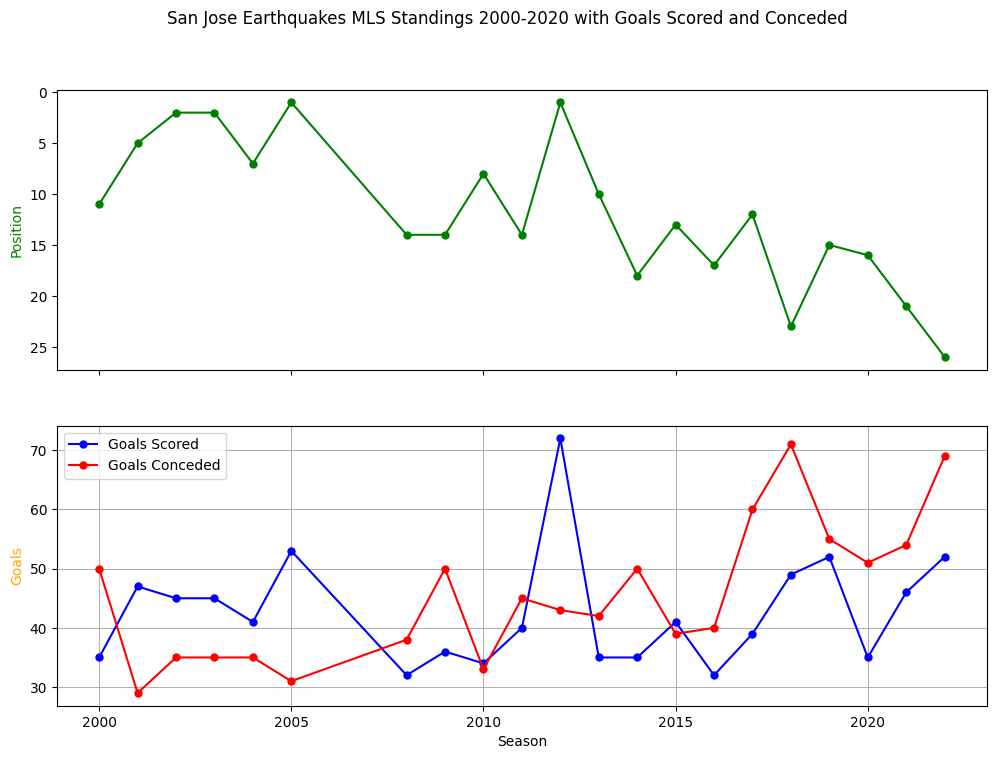

In [46]:
sj_data = table[table["Team"] == "SJ"]
sj_data = sj_data[["Season", "Pos", "PPG", "GF", "GA"]]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# first graph
ax1.plot(sj_data["Season"], sj_data["Pos"], color="green", label="Position", marker="o", markersize=5)
ax1.set_ylabel("Position", color="green")
ax1.invert_yaxis()  # Need to invert because lower number is better

# second graph 
ax2.plot(sj_data["Season"], sj_data["GF"], color="blue", label="Goals Scored", marker="o", markersize=5)
ax2.plot(sj_data["Season"], sj_data["GA"], color="red", label="Goals Conceded", marker="o", markersize=5)
ax2.set_ylabel("Goals", color="orange")
ax2.set_xlabel("Season")
ax2.legend(loc="upper left")

plt.suptitle("San Jose Earthquakes MLS Standings 2000-2020 with Goals Scored and Conceded")
plt.grid(True)
plt.show()

1) idea for machine learning
try and predict the standings at the end of the season based on historical precedent as well as any specific players that are playing
for example, if a team has a player that has scored 10 goals in the last 5 games, that team is likely to be higher in the standings
also, if a team has a goalie that has let in 10 goals in the last 5 games, that team is likely to be lower in the standings

2) second idea
similar to baseball dataset, predict which teams will make the playoffs based on historical precedent and players playing (best offensive player and best defensive player)

Text(0, 0.5, 'Position')

Text(0, 0.5, 'Goals')

Text(0.5, 0, 'Season')

Text(0.5, 1.0, 'San Jose Earthquakes Performance Over Time')

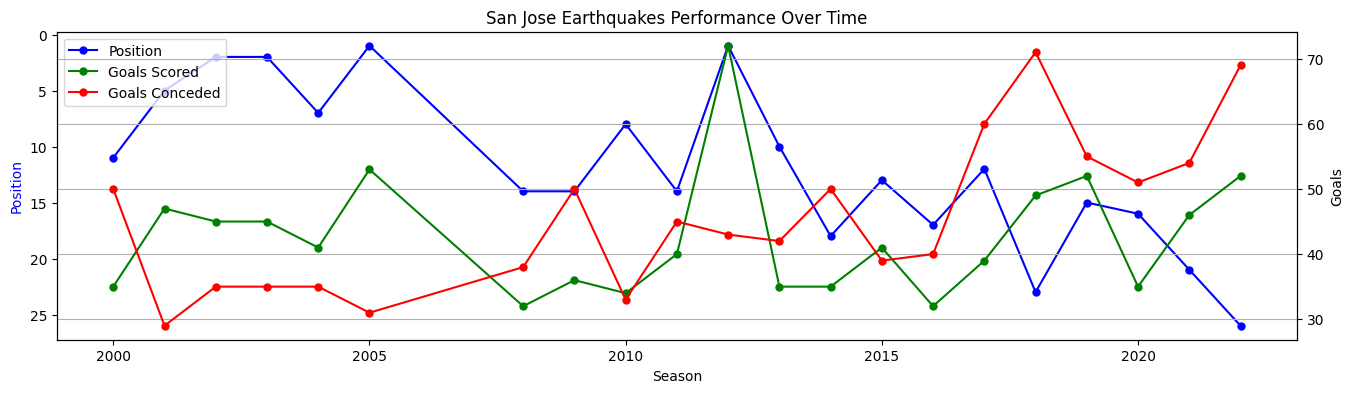

In [40]:
# cool graph here but decided to not use it in final presentation for my slides
# too much information and cluttered for the audience

sj_data = table[table["Team"] == "SJ"]
sj_data = sj_data[["Season", "Pos", "GF", "GA"]]

fig, ax1 = plt.subplots(figsize=(16, 4))

# Plot position on primary y-axis
pos_line = ax1.plot(sj_data["Season"], sj_data["Pos"], color="blue", label="Position", marker="o", markersize=5)
ax1.set_ylabel("Position", color="blue")
ax1.invert_yaxis()  # Invert y-axis for position

# Create secondary y-axis for goals scored and conceded
ax2 = ax1.twinx()
gf_line = ax2.plot(sj_data["Season"], sj_data["GF"], color="green", label="Goals Scored", marker="o", markersize=5)
ga_line = ax2.plot(sj_data["Season"], sj_data["GA"], color="red", label="Goals Conceded", marker="o", markersize=5)
ax2.set_ylabel("Goals", color="black")

# Combine legends
lines = pos_line + gf_line + ga_line
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Set x-axis label
ax1.set_xlabel("Season")

# Add title and grid
plt.title("San Jose Earthquakes Performance Over Time")
plt.grid(True)

plt.show()
